<a href="https://colab.research.google.com/github/reyanshgupta/SEM_5_IVP/blob/main/IVP_Experiment_4_Masks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

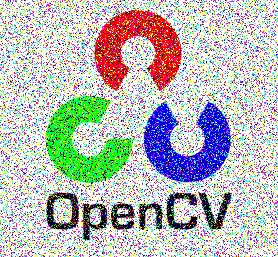

In [3]:
noisy = cv2.imread('noise.png')
cv2_imshow(noisy)

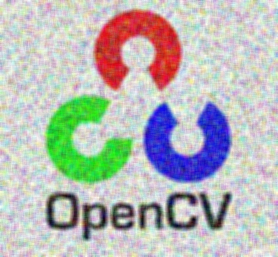

In [4]:
noisy = cv2.blur(noisy,(5,5))
cv2_imshow(noisy)

In [5]:
mask = np.ones([3,3],dtype=int)
mask=mask/9

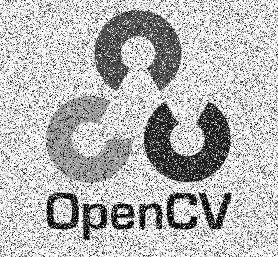

In [6]:
img = cv2.imread('noise.png',0) #bw
cv2_imshow(img)
m,n =img.shape
img_new = np.zeros([m,n])

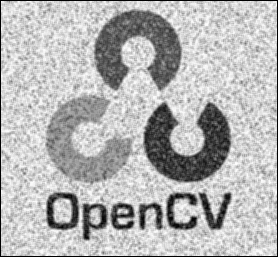

In [9]:
for i in range(1,m-1):
  for j in range(1,n-1):
    temp=img[i-1,j-1]*mask[0,0]+img[i-1,j]*mask[0,1]+img[i-1,j+1]*mask[0,2]+img[i,j-1]*mask[1,0]+img[i,j]*mask[1,1]+img[i,j+1]*mask[1,2]+img[i+1,j-1]*mask[2,0]+img[i+1,j]*mask[2,1]+img[i+1,j+1]*mask[2,2]
    img_new[i,j]=temp
cv2_imshow(img_new)
im2 = cv2.blur(img,(5,5))

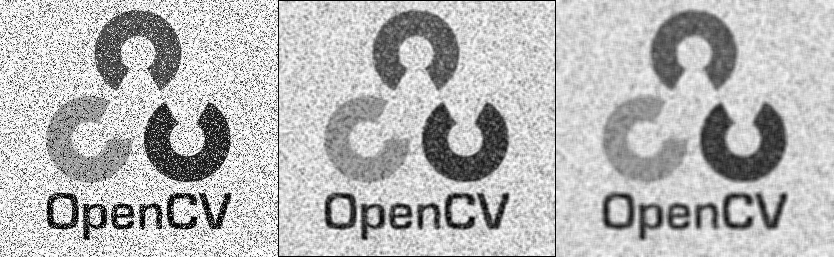

In [10]:
cv2_imshow(np.hstack((img,img_new,im2)))

In [11]:
imgwithin=cv2.filter2D(img,-1,mask)

In [12]:
median = cv2.medianBlur(img,5)

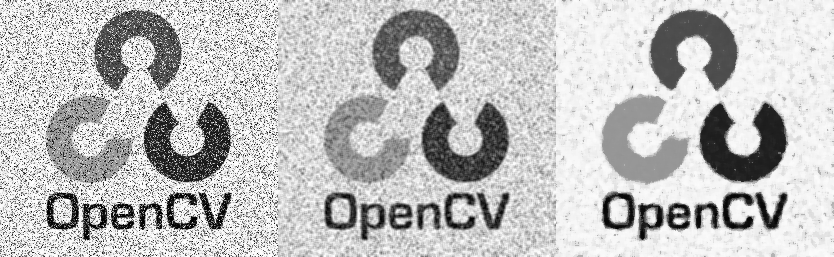

In [14]:
cv2_imshow(np.hstack((img,imgwithin,median)))

In [15]:
mask = np.ones([5,5],dtype=int)

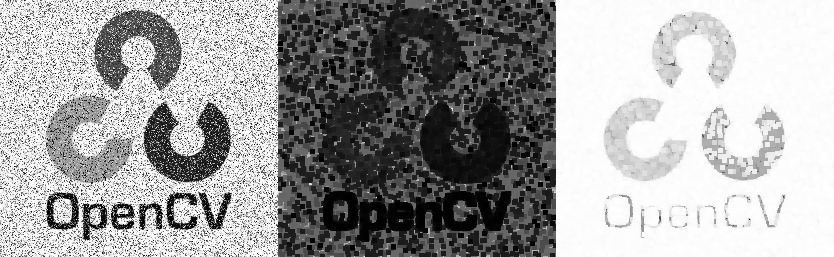

In [16]:
erodedimage = cv2.erode(img,mask,iterations=1)
dilateimage =cv2.dilate(img,mask,iterations=1)
cv2_imshow(np.hstack((img,erodedimage,dilateimage)))

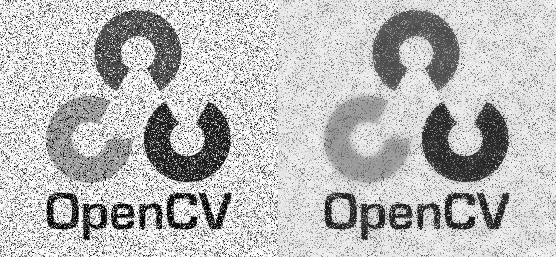

In [19]:
bilateral = cv2.bilateralFilter(img,15,75,75)
cv2_imshow(np.hstack((img,bilateral)))